\pagebreak
\thispagestyle{empty}
\graphicspath{{images/}}
\vspace*{1cm}
\begin{center}
    \LARGE
    \textbf{Department of Operational Research}\\
    University of Delhi\\
    
    \vspace{1.5cm}
    \includegraphics[width=0.3\textwidth]{logo.png}
    \vspace{1cm}

    \Huge
    \textbf{\textsc{Final Assignment}}\\
    \vspace{0.5cm}
    \Large
    \textit{Submitted for the course}\\
    \textit{MOR202: Scheduling Techniques}\\
    \vspace{1.5cm}

    \textsc{Submitted by}\\
    \textbf{Om Gupta} (32347)\\
    \large
    Exam Roll No.: 24236761066\\
    761: Master of Operational Research\\
    North Department\\
    Section - A\\
    \vspace{1.5cm}
    
    \Large
    \textsc{Submitted to}\\
    \textbf{Mr. Kaushal Kumar}\\
    \large
    Assistant Professor\\
    Department of Operational Research\\
\end{center}

\pagebreak

\thispagestyle{empty}
\renewcommand\contentsname{\centering \Huge Table of Contents}
\tableofcontents
\pagebreak
\pagenumbering{arabic}

# **Introduction**

This assignment explores a comprehensive application of project scheduling and optimization techniques within a real-world-like scenario involving a complex project structure. It primarily focuses on key methodologies in project management, mentioned below.

## **Methodologies**
Let's look at the methodologies that will be used in this assignment very briefly.

### Critical Path Method (CPM)
It is used to determine the longest sequence of dependent activities and the shortest possible project duration. Network diagrams are constructed to visualize the project structure, and the critical path is identified by calculating the earliest and latest start and finish times for each activity.

### Project Crashing
It is used to shorten the project duration by accelerating specific activities. It involves analyzing the cost and time trade-offs associated with expediting tasks. The goal is to identify which activities can be shortened and by how much, while considering the associated costs. This analysis helps in making informed decisions about resource allocation and scheduling adjustments.

### Resource Allocation
It is used to optimize the use of available resources across the project timeline. This involves assigning resources to activities in a way that minimizes overallocation and ensures that tasks are completed efficiently. Resource leveling techniques are applied to balance resource usage, avoid bottlenecks, and maintain a smooth workflow throughout the project.

The assignment aims to enhance decision-making regarding time and resource trade-offs, ultimately leading to improved project delivery and efficiency.

## **Problem Statement**

The problem involves managing a complex project comprising **50 interrelated activities**, labeled **A1 through A50**, each having predefined durations and dependencies.

The key objectives of this analysis are:

* To **construct the project network** based on activity precedence.
* To **identify the critical path**, i.e., the sequence of tasks that directly determine the total project duration.
* To **calculate the earliest and latest start/finish times** for each activity, as well as the **total float** (slack) to identify scheduling flexibility.
* To **perform project crashing**, assessing how much the project duration can be reduced by accelerating specific activities, while minimizing the additional cost or resource burden.
* To **allocate and level resources** in a way that avoids overallocation and optimizes resource utilization throughout the project timeline.

The final deliverables include a detailed critical path analysis, network diagram visualizations, crashing results, and a resource usage report (Gantt) with optimized scheduling.


## **About the Data**

The dataset used for this assignment consists of **50 project activities**, labeled sequentially from **A1 to A50**. Each activity record contains:

* **Activity ID**: Unique identifier for each activity (e.g., A1, A2, ..., A50).

* **Duration**: The time required to complete the activity, measured in days (e.g., 2, 3, ..., 8).

* **Predecessors**: A comma-separated list of activities that must be completed before the current activity can start (e.g., A1, A2, ..., A50).

This data forms the foundation for constructing the project network and performing the subsequent analyses. The activity **dataset** is illustrated below to provide an overview of its structure:

|ID |Duration|Predecessors|      |ID |Duration|Predecessors|
|---|--------|------------|------|---|--------|------------|
|A1 |3       |            |      |A26|5       |A21         |
|A2 |4       |A1          |      |A27|6       |A22,A23     |
|A3 |2       |A2          |      |A28|5       |A23,A24     |
|A4 |3       |A3          |      |A29|8       |A24         |
|A5 |4       |A4          |      |A30|4       |A25,A26     |
|A6 |2       |A5          |      |A31|5       |A26         |
|A7 |3       |A6          |      |A32|6       |A27         |
|A8 |4       |A3          |      |A33|7       |A28,A29     |
|A9 |2       |A8          |      |A34|5       |A30         |
|A10|3       |A9          |      |A35|4       |A30,A31     |
|A11|6       |A10         |      |A36|2       |A32         |
|A12|5       |A7,A11      |      |A37|3       |A33         |
|A13|4       |A8,A12      |      |A38|2       |A37         |
|A14|5       |A9,A13      |      |A39|2       |A34         |
|A15|6       |A14         |      |A40|3       |A35         |
|A16|3       |A11         |      |A41|4       |A36,A37     |
|A17|4       |A12         |      |A42|2       |A38         |
|A18|5       |A13,A14     |      |A43|2       |A42         |
|A19|6       |A15         |      |A44|4       |A39         |
|A20|3       |A15,A16     |      |A45|2       |A40,A41     |
|A21|5       |A16         |      |A46|5       |A45         |
|A22|6       |A17,A18     |      |A47|2       |A46         |
|A23|7       |A18,A19     |      |A48|3       |A47         |
|A24|8       |A20         |      |A49|4       |A44,A45     |
|A25|4       |A20         |      |A50|5       |A43,A48,A49 |

This dataset is crucial for constructing the project network and performing the subsequent analyses.

We will be implementing the project scheduling and optimization techniques using **`Python`**. The analysis will be performed using libraries such as `pandas`, `networkx`, and `matplotlib` for data manipulation, network analysis, and visualization, respectively. Let's start by importing the required libraries and loading the dataset into a DataFrame for further analysis.

In [1]:
import pandas as pd
import networkx as nx
from PIL import Image as Img
import dataframe_image as dfi
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib.patches as mpatches
from IPython.display import Image, display
from networkx.drawing.nx_pydot import graphviz_layout

Now, that we have imported the required libraries, let's load the dataset into a DataFrame and take a look at the entire data to understand its structure.

In [2]:

ids = [f"A{i+1}" for i in range(50)]

durations = [
    3, 4, 2, 3, 4, 2, 3, 4, 2, 3,  # A1  - A10
    6, 5, 4, 5, 6, 3, 4, 5, 6, 3,  # A11 - A20
    5, 6, 7, 8, 4, 5, 6, 5, 8, 4,  # A21 - A30
    5, 6, 7, 5, 4, 2, 3, 2, 2, 3,  # A31 - A40
    4, 2, 2, 4, 2, 5, 2, 3, 4, 5   # A41 - A50
]

predecessors = [
    "",            # A1 (Entry point)
    "A1",          # A2
    "A2",          # A3
    "A3",          # A4
    "A4",          # A5
    "A5",          # A6
    "A6",          # A7
    "A3",          # A8
    "A8",          # A9
    "A9",          # A10
    "A10",         # A11
    "A7,A11",      # A12
    "A8,A12",      # A13
    "A9,A13",      # A14
    "A14",         # A15
    "A11",         # A16
    "A12",         # A17
    "A13,A14",     # A18
    "A15",         # A19
    "A15,A16",     # A20
    "A16",         # A21
    "A17,A18",     # A22
    "A18,A19",     # A23
    "A20",         # A24
    "A20",         # A25
    "A21",         # A26
    "A22,A23",     # A27
    "A23,A24",     # A28
    "A24",         # A29
    "A25,A26",     # A30
    "A26",         # A31
    "A27",         # A32
    "A28,A29",     # A33
    "A30",         # A34
    "A30,A31",     # A35
    "A32",         # A36
    "A33",         # A37
    "A37",         # A38
    "A34",         # A39
    "A35",         # A40
    "A36,A37",     # A41
    "A38",         # A42
    "A42",         # A43
    "A39",         # A44
    "A40,A41",     # A45
    "A45",         # A46
    "A46",         # A47
    "A47",         # A48
    "A44,A45",     # A49
    "A43,A48,A49"  # A50 (Exit point)
]

df = pd.DataFrame({
    "ID": ids,
    "Duration": durations,
    "Predecessors": predecessors,
})

df.to_csv('data/data.csv')

df.head()

,ID,Duration,Predecessors
0,A1,3,
1,A2,4,A1
2,A3,2,A2
3,A4,3,A3
4,A5,4,A4


Above are first few rows of the dataset stored in `df` DataFrame.

Now, that we have seen the data, we can proceed with the critical path analysis. The critical path analysis involves several steps, including calculating the earliest start time (EST), earliest finish time (EFT), latest start time (LST), latest finish time (LFT), and total float (TF) for each activity. The critical path is then identified based on activities with zero total float.


# **Critical Path Analysis**

The Critical Path Method (CPM) is a technique used to determine the longest sequence of activities in a project plan which must be completed on time for the project to complete on schedule. This path determines the total duration of the project.

## **Formulae**

### Earliest Start Time (EST)

$$EST_i = max\{EFT_j\}$$ for all predecessors j of activity i

### Earliest Finish Time (EFT) 

$$EFT_i = EST_i + Duration_i$$

### Latest Finish Time (LFT)

$$LFT_i = min\{LST_k\}$$ for all successors k of activity i

### Latest Start Time (LST) 

$$LST_i = LFT_i - Duration_i$$

### Total Float (TF)

$$TF_i = LST_i - EST_i = LFT_i - EFT_i$$

## **Algorithm Steps**

1.  **Forward Pass:** Calculate the EST and EFT for each activity, starting from the project start date.

2.  **Backward Pass:** Calculate the LST and LFT for each activity, starting from the project completion date.

3.  **Determine Critical Path:** Identify activities with a total float of zero. These activities form the critical path.

## **Critical Path Analysis on the Project Data**
We start by calculating the earliest start time (EST), earliest finish time (EFT), latest start time (LST), latest finish time (LFT), and total float (TF) for each activity in the project. The critical path is then identified based on activities with zero total float.

### Critical Path Method (CPM) Process

Below we calculate the earliest start time (EST), earliest finish time (EFT), latest start time (LST), latest finish time (LFT), and total float (TF) for each activity in the project. The results are stored in a DataFrame named `df_cpm` which is then used to identify the critical path based on activities with zero total float. Finally, network diagram is plotted to visualise the project structure and critical path.

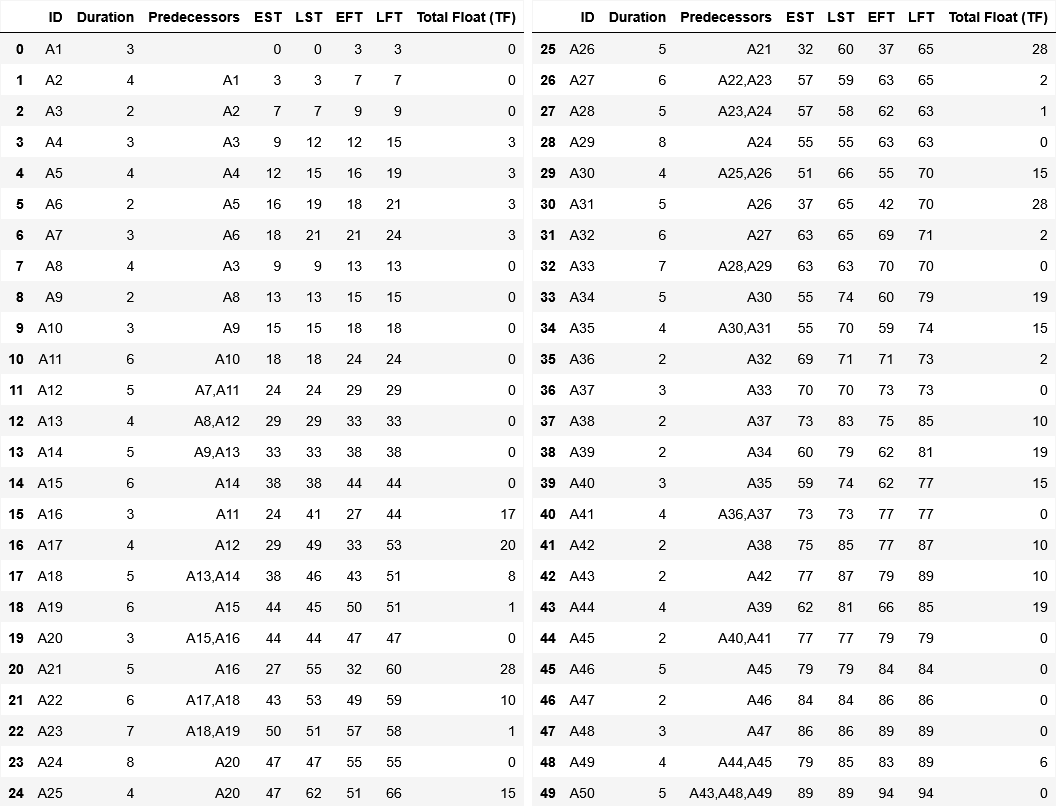

In [3]:
est, eft, lst, lft, total_float = {}, {}, {}, {}, {}

# Build predecessor and successor maps
predecessor_map = {row['ID']: [p.strip() for p in row['Predecessors'].split(',') if p.strip()] for _, row in df.iterrows()}
successor_map = defaultdict(list)
for act, preds in predecessor_map.items():
    for p in preds:
        successor_map[p].append(act)

# Forward Pass: Compute EST and EFT
for _, row in df.iterrows():
    act = row['ID']
    duration = row['Duration']
    preds = predecessor_map[act]
    
    est[act] = max([eft[p] for p in preds] if preds else [0])
    eft[act] = est[act] + duration

# Identify terminal nodes (no successors)
terminal_nodes = [act for act in df['ID'] if not successor_map[act]]
project_duration = max([eft[act] for act in terminal_nodes])

# Backward Pass: Compute LFT and LST
for act in reversed(df['ID']):
    duration = df.loc[df['ID'] == act, 'Duration'].values[0]
    succs = successor_map[act]
    
    lft[act] = min([lst[s] for s in succs] if succs else [project_duration])
    lst[act] = lft[act] - duration

# Total Float
for act in df['ID']:
    total_float[act] = lst[act] - est[act]

# Add results to DataFrame
df['EST'] = df['ID'].map(est)
df['LST'] = df['ID'].map(lst)
df['EFT'] = df['ID'].map(eft)
df['LFT'] = df['ID'].map(lft)
df['Total Float (TF)'] = df['ID'].map(total_float)

# Final CPM DataFrame
df_cpm = df[['ID', 
             'Duration', 
             'Predecessors', 
             'EST', 
             'LST', 
             'EFT', 
             'LFT', 
             'Total Float (TF)'
            ]]
df_cpm.to_csv('data/data_cpm.csv')

# Helper function to show the DataFrame as image
def show_df(df, name, gap=8, split=False):
    if split:
        half = len(df) // 2
        
        df1 = df.iloc[:half]
        df2 = df.iloc[half:]

        dfi.export(df1, f"images/tmp_1.png", table_conversion='selenium')
        dfi.export(df2, f"images/tmp_2.png", table_conversion='selenium')
        
        image1 = Img.open("images/tmp_1.png")
        image2 = Img.open("images/tmp_2.png")

        width1, height1 = image1.size
        width2, height2 = image2.size

        new_width = width1 + width2 + gap
        new_height = max(height1, height2)

        new_image = Img.new('RGB', (new_width, new_height), color='white')

        new_image.paste(image1, (0, 0))
        new_image.paste(image2, (width1+gap, 0))

        new_image.save(f"images/{name}.png")

    else:
        dfi.export(df, f"images/{name}.png", table_conversion='selenium')
    
    display(Image(f"images/{name}.png"))

show_df(df_cpm, "df_cpm", split=True)

Above, we can see the complete `df_cmp` DataFrame with the calculated values for each activity. Now, let's look at the critical path of the project via the network diagram.

### AOA Network Diagram

Now, that we have computed the earliest and latest start and finish times for each activity, we can identify the critical path. The critical path is the sequence of activities that cannot be delayed without delaying the project. Activities on the critical path have a total float of zero. Below we make the **AOA network diagram** of the project to visualize the activities and their dependencies. The critical path is highlighted in `black` and rest is `gray` in color.

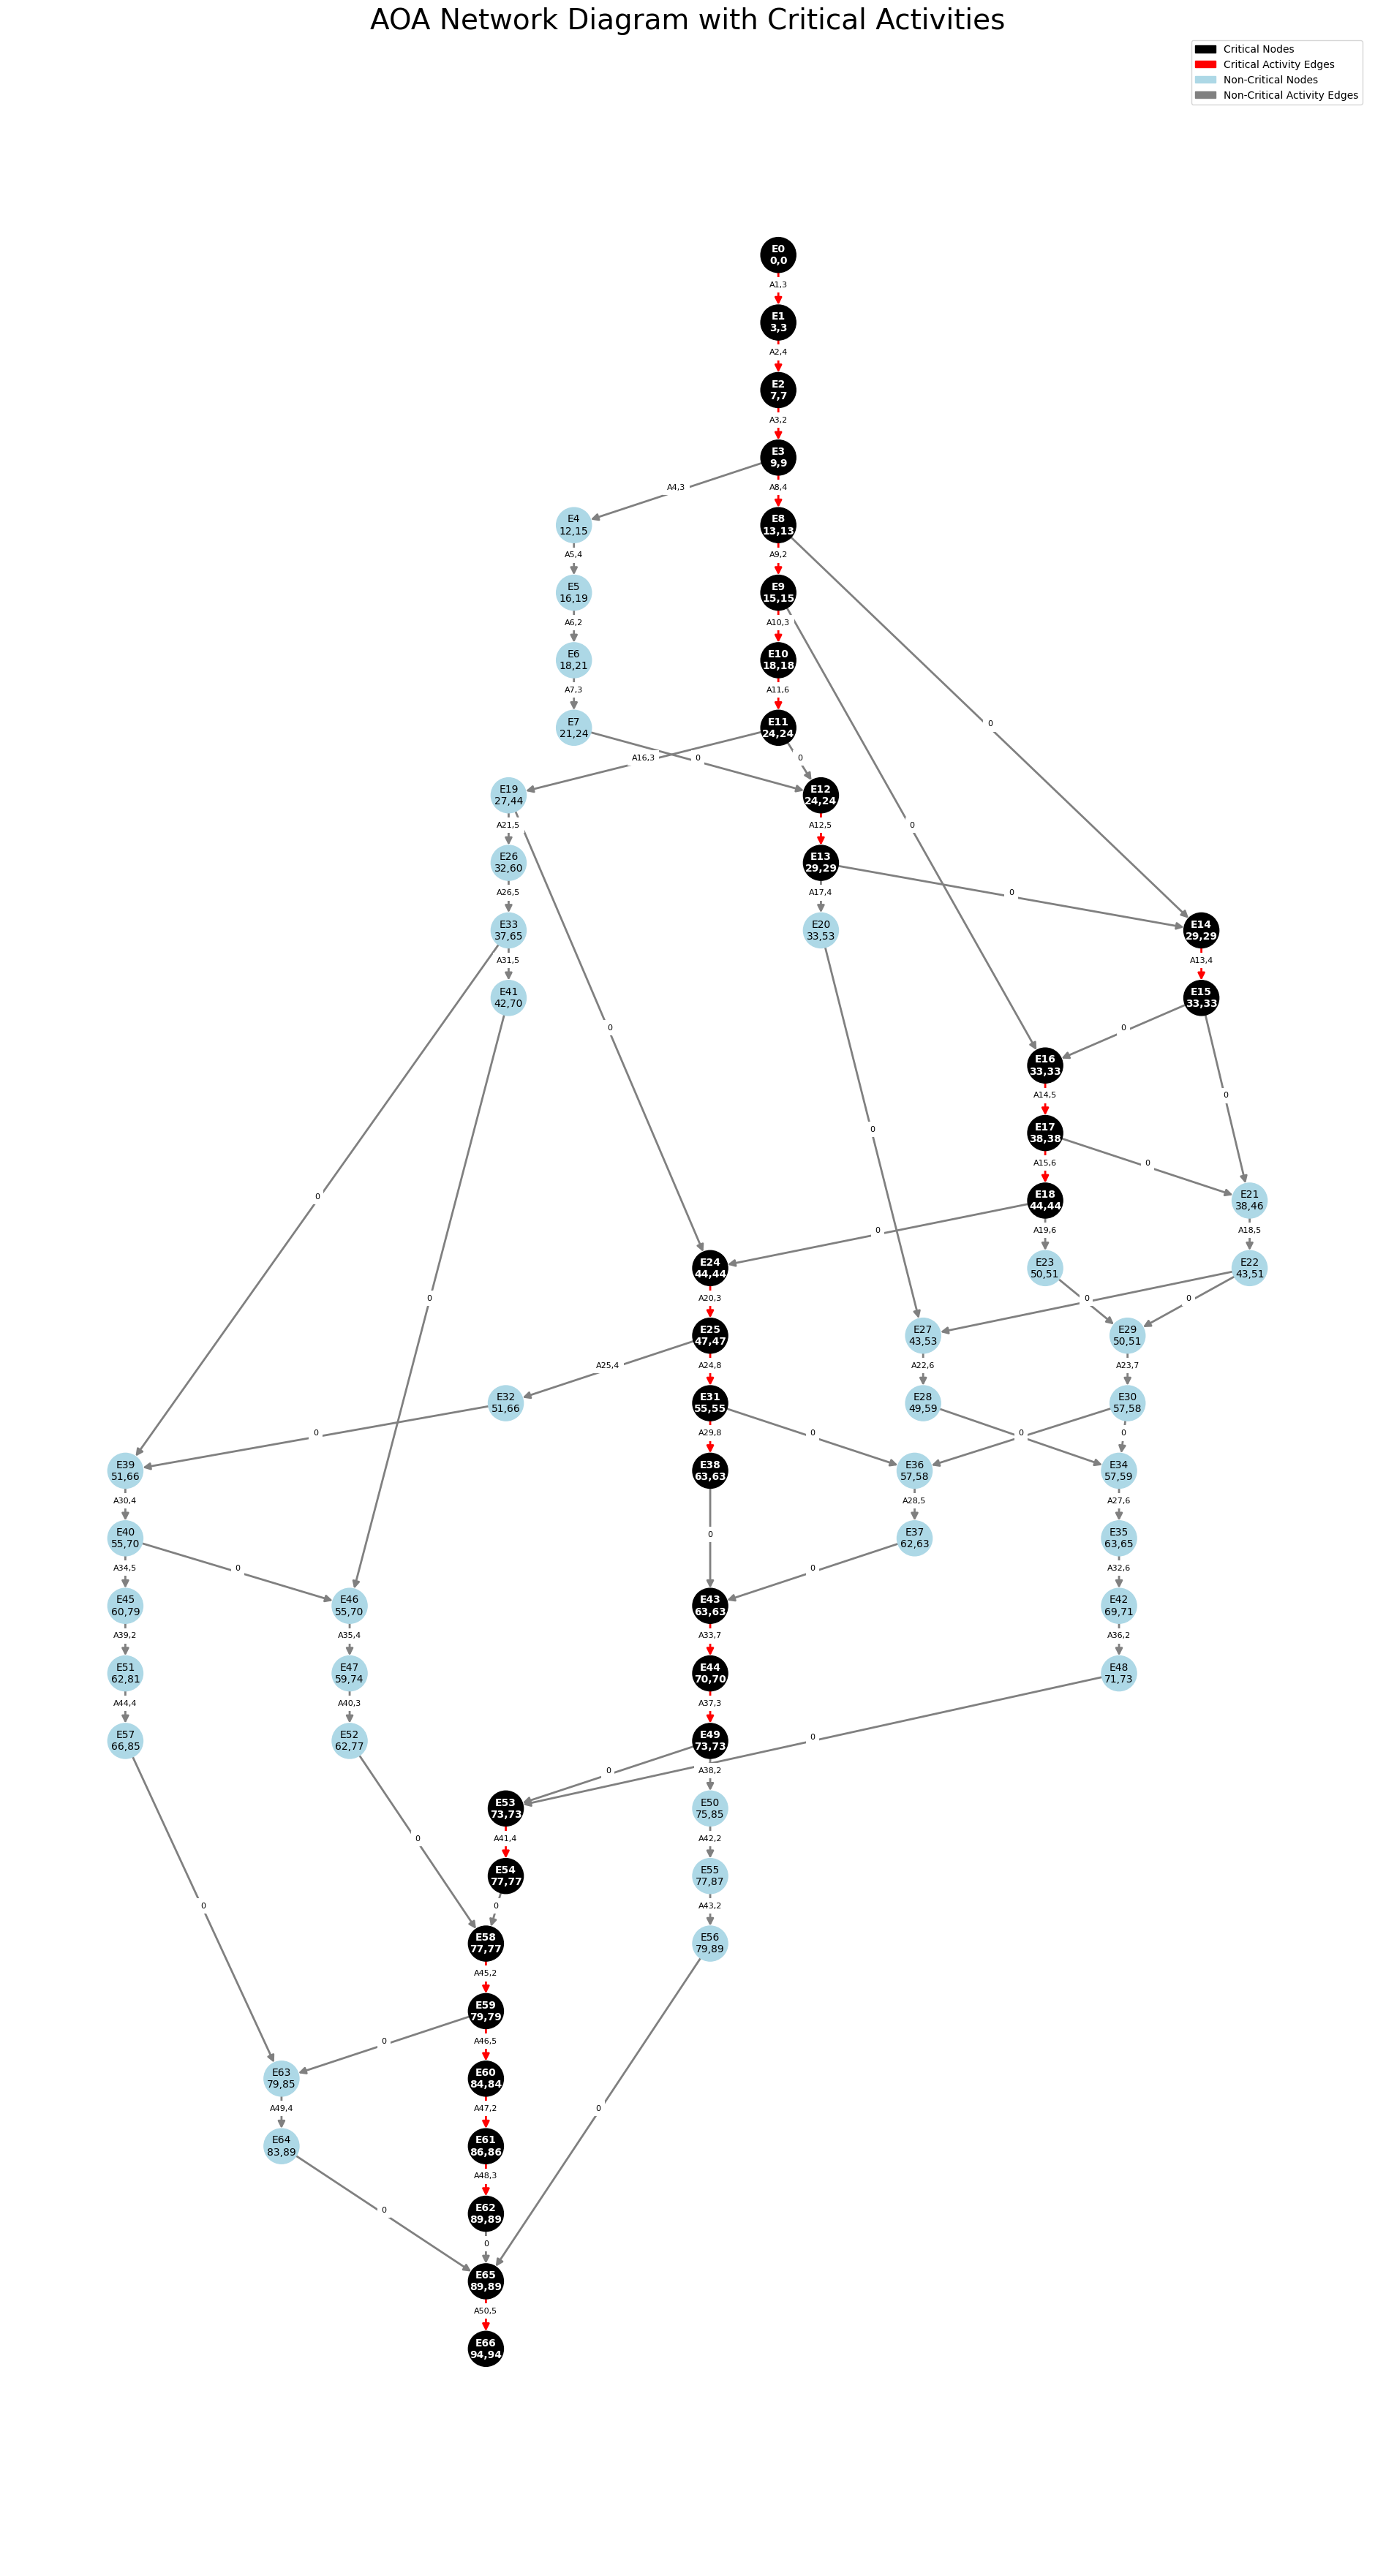

In [4]:
G = nx.DiGraph()

event_counter = 0 # Helper to generate unique event nodes
activity_to_events = {}

# Step 1: Add nodes and edges
for index, row in df.iterrows():
    activity = row['ID']
    duration = row['Duration']
    preds = [p.strip() for p in row['Predecessors'].split(',') if p.strip()]

    if not preds:
        # Entry point
        start_node = f"E{event_counter}"
        event_counter += 1
        end_node = f"E{event_counter}"
        event_counter += 1
    elif len(preds) == 1:
        # Single predecessor
        start_node = activity_to_events[preds[0]][1]
        end_node = f"E{event_counter}"
        event_counter += 1
    else:
        # Multiple predecessors
        start_node = f"E{event_counter}"
        event_counter += 1
        end_node = f"E{event_counter}"
        event_counter += 1
        for pred in preds:
            pred_end = activity_to_events[pred][1]
            G.add_edge(pred_end, start_node, label="0", style='dotted', color='gray')
    activity_to_events[activity] = (start_node, end_node)
    G.add_edge(start_node, end_node, label=f"{activity},{duration}", weight=duration)

# Step 2: Event-level EST and LST calculation
event_times = {}

for activity, (start_event, end_event) in activity_to_events.items():
    est_val = est[activity]
    lst_val = lst[activity]
    eft_val = eft[activity]
    lft_val = lft[activity]

    if start_event not in event_times:
        event_times[start_event] = {'EST': est_val, 'LST': lst_val}
    else:
        event_times[start_event]['EST'] = min(event_times[start_event]['EST'], est_val)
        event_times[start_event]['LST'] = min(event_times[start_event]['LST'], lst_val)
    if end_event not in event_times:
        event_times[end_event] = {'EST': eft_val, 'LST': lft_val}
    else:
        event_times[end_event]['EST'] = max(event_times[end_event]['EST'], eft_val)
        event_times[end_event]['LST'] = max(event_times[end_event]['LST'], lft_val)

# Step 3: Prepare node labels with (EST, LST)
node_labels = {node: f"{node}\n{times['EST']},{times['LST']}" for node, times in event_times.items()}

# Step 4: Identify critical activities
critical_activities = [act for act, tf in total_float.items() if tf == 0]

# Step 5: Determine edge styles and colors
edge_colors = []
for u, v in G.edges():
    label = G[u][v].get('label', '')
    if label.startswith("0"):
        edge_colors.append('gray')
    else:
        activity_id = label.split(',')[0]  # Extract activity name from label
        color = 'red' if activity_id in critical_activities else 'gray'
        edge_colors.append(color)

node_colors = []
for node in G.nodes():
    times = event_times.get(node)
    if times and times['EST'] == times['LST']:
        node_colors.append('black')  # Critical node
    else:
        node_colors.append('lightblue')  # Non-critical

font_colors = {}
for node in G.nodes():
    times = event_times.get(node)
    if times and times['EST'] == times['LST']:
        font_colors[node] = 'white'  # Critical node
    else:
        font_colors[node] = 'black'  # Non-critical

# Step 6: Plot the main AOA network diagram
plt.figure(figsize=(24, 45))
pos = graphviz_layout(G, prog="dot")
edge_labels = nx.get_edge_attributes(G, 'label')
for (u, v), label in edge_labels.items():
    # Midpoint of the edge
    x1, y1 = pos[u]
    x2, y2 = pos[v]
    xm, ym = (x1 + x2) / 2, ((y1 + y2) / 2) + 5
    plt.text(xm, 
             ym, 
             label,
             fontsize=8,
             ha='center',
             va='center',
             bbox=dict(facecolor='white', 
                       edgecolor='none')
            )

nx.draw(
    G, pos,
    node_size=1200, node_color=node_colors, node_shape='o', 
    labels=node_labels, edge_color=edge_colors,
    font_size=10, font_color='black',
    arrows=True, arrowsize=14, 
    arrowstyle='-|>',
    with_labels=True, 
    width = 2
)
 
for node in G.nodes():  # mark critical nodes with white
    x, y = pos[node]
    label = node_labels[node]
    color = 'white' if event_times[node]['EST'] == event_times[node]['LST'] else 'none'
    plt.text(x, y, label, fontsize=10, ha='center', va='center', color=color, fontweight='bold')

plt.title("AOA Network Diagram with Critical Activities", fontsize=28)
plt.axis('off')
critical_patch = mpatches.Patch(color='black', 
                                label='Critical Nodes')
non_critical_patch = mpatches.Patch(color='lightblue', 
                                    label='Non-Critical Nodes')
critical_edge_patch = mpatches.Patch(color='red', 
                                     label='Critical Activity Edges')
non_critical_edge_patch = mpatches.Patch(color='gray', 
                                         label='Non-Critical Activity Edges')
plt.legend(handles=[critical_patch, 
                    critical_edge_patch, 
                    non_critical_patch, 
                    non_critical_edge_patch], loc='best')
plt.savefig('images/network-diagram.png', dpi=300)
plt.show();


Let's also make a gantt chart to visualize the project schedule. The critical path activities are highlighted in `red` and the rest are in `blue`. The x-axis represents the time in days, while the y-axis lists the activities. The bars represent the duration of each activity, with the critical path activities clearly marked.

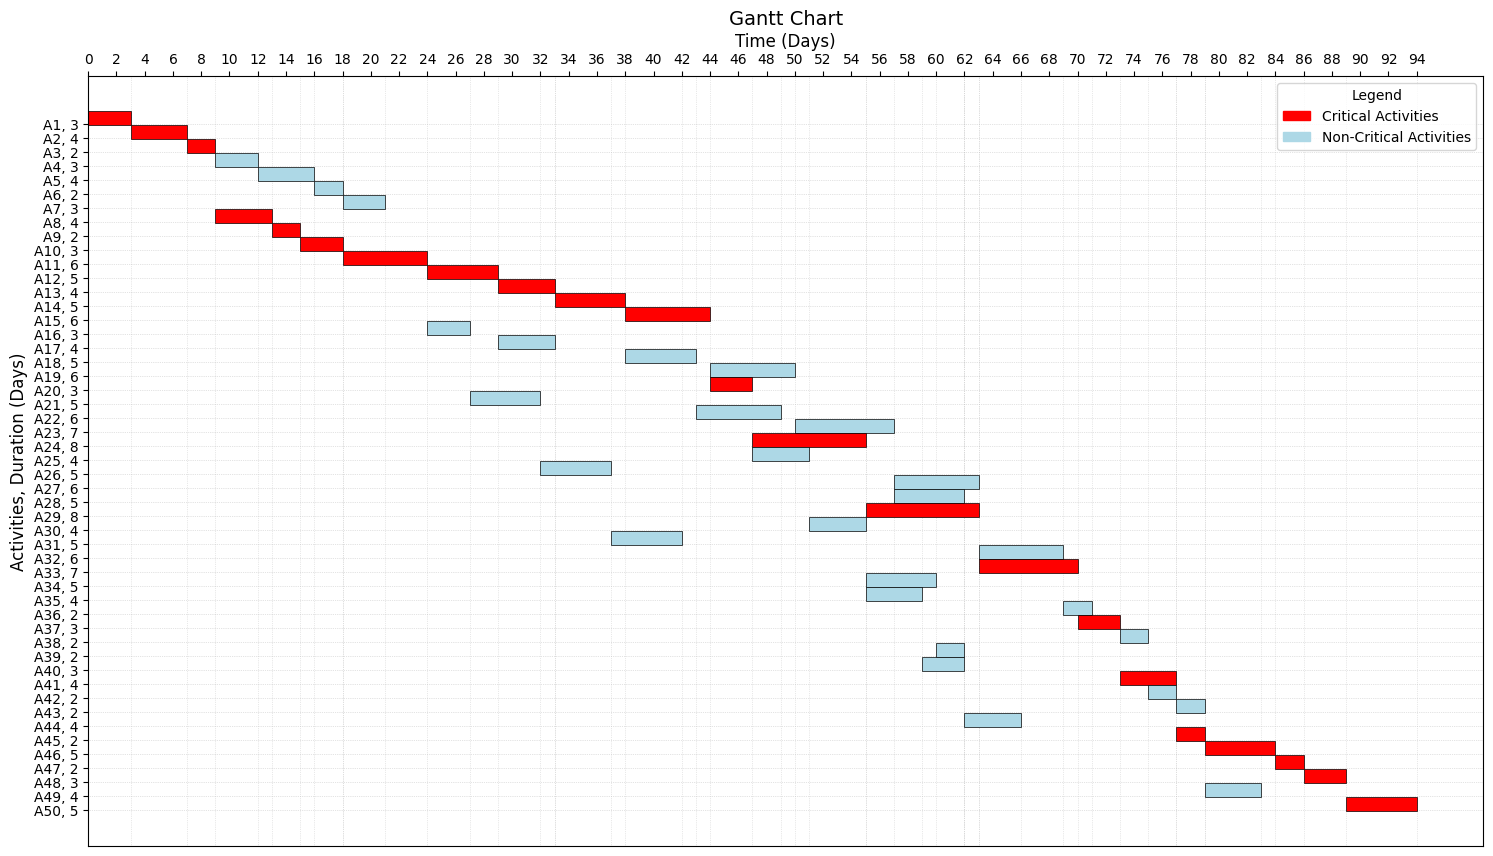

In [5]:
# Create a Gantt chart
fig, ax = plt.subplots(figsize=(18, 10))

# Define colors for critical and non-critical activities
critical_color = 'red'
non_critical_color = 'lightblue'

# Define the offset to shift bars up
offset = 0.4

# Iterate through the DataFrame to plot each activity
for i, row in df.iterrows():
    activity = row['ID']
    start = row['EST']
    finish = row['EFT']
    is_critical = row['Total Float (TF)'] == 0

    # Plot the activity as a horizontal bar with an offset
    ax.barh(i - offset, finish - start, left=start, color=critical_color if is_critical else non_critical_color, 
            edgecolor='black',linewidth=0.5, height=1.01)

# Add labels and title
ax.set_xlabel("Time (Days)", fontsize=12)
ax.set_ylabel("Activities, Duration (Days)", fontsize=12)
ax.set_title("Gantt Chart", fontsize=14)

# Set y-ticks to display "Activity ID, Duration"
yticks = [f"{row['ID']}, {row['Duration']}" for _, row in df.iterrows()]
ax.set_yticks(range(len(df)))
ax.set_yticklabels(yticks)

# Add grid lines
ax.grid(axis='y', linestyle=':', alpha=0.7, linewidth=0.5)  # Horizontal grid lines

# Flip the time axis to the top
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

# Flip the y-axis to show A1 -> A50
ax.invert_yaxis()

# Add more ticks on the x-axis
max_time = df['EFT'].max()
ax.set_xticks(range(0, max_time + 1, 2))  # Add ticks every 2 days

# Add dashed lines to indicate continuation of the next bar
for i, row in df.iterrows():
    finish = row['EFT']
    # Draw a dashed line at the end of the activity bar
    ax.axvline(x=finish, color='lightgray', linestyle=':', linewidth=0.5, zorder=0)

# Move grid lines behind the bars
ax.set_axisbelow(True)

critical_patch = mpatches.Patch(color=critical_color, label='Critical Activities')
non_critical_patch = mpatches.Patch(color=non_critical_color, label='Non-Critical Activities')
ax.legend(handles=[critical_patch, non_critical_patch], title="Legend", loc='upper right', fontsize=10)

plt.savefig('images/gantt-chart.png', dpi=300)
plt.show();

Let's also print the **critical path** and the **critical activities** in the project. The critical path is the longest path through the project network, and it determines the minimum project duration. The activities on this path are critical, meaning any delay in these activities will directly impact the overall project completion time. We will also print the total duration of the project, which is the sum of the durations of the activities on the critical path.

In [6]:
start_node = min(G.nodes(), key=lambda x: int(x[1:]))  # Smallest event ID, e.g., E0
end_node = max(G.nodes(), key=lambda x: int(x[1:]))    # Largest event ID, e.g., E50
all_paths = list(nx.all_simple_paths(G, source=start_node, target=end_node))
def get_duration(u, v):
    label = G[u][v].get('label', '')
    if ',' in label:
        try:
            return int(label.split(',')[1])
        except (IndexError, ValueError):
            return 0
    return 0  # For dummy edges or empty labels
path_durations = []
for path in all_paths:
    total_duration = sum(get_duration(u, v) for u, v in zip(path[:-1], path[1:]))
    path_durations.append((total_duration, path))
critical_duration, critical_path = max(path_durations, key=lambda x: x[0])
print("\nCritical Path:")
print(" → ".join(critical_path))
print(f"\nCritical Activities ({len(critical_activities)}):")
for i in range(len(critical_activities)):
    print(critical_activities[i], end=", " if i < len(critical_activities) - 1 else "\n")
print(f"\nTotal Project Duration (Critical Path Length): {max(eft.values())} Days")


Critical Path:
E0 → E1 → E2 → E3 → E8 → E9 → E10 → E11 → E12 → E13 → E14 → E15 → E16 → E17 → E18 → E24 → E25 → E31 → E38 → E43 → E44 → E49 → E53 → E54 → E58 → E59 → E60 → E61 → E62 → E65 → E66

Critical Activities (22):
A1, A2, A3, A8, A9, A10, A11, A12, A13, A14, A15, A20, A24, A29, A33, A37, A41, A45, A46, A47, A48, A50

Total Project Duration (Critical Path Length): 94 Days


Now, we have completed the critical path analysis and identified the critical activities in the project. We will proceed with the next step, which is to perform project crashing.



# **Project Crashing**

Project crashing is the process of reducing the total project duration by accelerating certain activities. This is typically done by allocating additional resources or increasing the work hours for those activities. The goal is to minimize the cost of crashing while achieving the desired reduction in project duration.

## **Formula**

The formula for **Marginal Cost** (MC) is 
$$MC = \frac{CC - NC}{NT - CT}$$

where:

* **CC**: Crash Cost

* **NC**: Normal Cost

* **NT**: Normal Time

* **CT**: Crash Time

* **MC**: Marginal Cost

and,

* **Crash Cost**: The cost incurred to complete the activity in the minimum possible time (Crash Time).

* **Normal Cost**: The cost incurred to complete the activity under normal conditions.

* **Normal Time**: The time required to complete the activity under normal conditions.

* **Crash Time**: The minimum possible time required to complete the activity if additional resources are allocated.

* **Marginal Cost**: The additional cost incurred to reduce the activity duration by one day.

## **Algorithm Steps**

1. Compute  the **marginal** cost for each activity.
2. Identify the **critical activities** of the project.
3. Identify the **subset** of critical activities which when compressed in parallel reduce the duration of **all** criticlal paths.
4. Perform crashing until on or both of the following two conditions are met:
    1. All the critical activities are crashed completely.
    2. A new path becomes critical.
5. Repeat the above steps, till you reach a stage when a least 1 of the critical activities **cannot** be crashed further.


## **Crashing on the Project Data**
Now, let's implement the above steps in Python to analyse the project data and perform the required calculations. We will start by looking at the crashing costs and the normal costs of the activities. We will also look at the marginal costs of the activities to identify which activities can be crashed to reduce the project duration. We will then perform the crashing and print the results.

### Crashing Dataframe
The `df_crash` DataFrame contains the following columns:

1. **ID**: The unique identifier for each activity in the project (e.g., A1, A2, etc.).

2. **Duration**: The original duration (in days) required to complete the activity under normal conditions.

3. **Predecessors**: A list of activities that must be completed before the current activity can start.

4. **Normal Time (NT)**: The time (in days) required to complete the activity under normal conditions.

5. **Crash Time (CT)**: The minimum possible time (in days) required to complete the activity if additional resources are allocated.

6. **Normal Cost (NC)**: The cost (in Rs.) associated with completing the activity under normal conditions.

7. **Crash Cost (CC)**: The cost (in Rs.) associated with completing the activity in the minimum possible time (Crash Time).

8. **Resources (units/day)**: The number of resource units required per day to complete the activity.

9. **Marginal Cost (MC)**: The additional cost per day incurred to reduce the activity duration by one day.


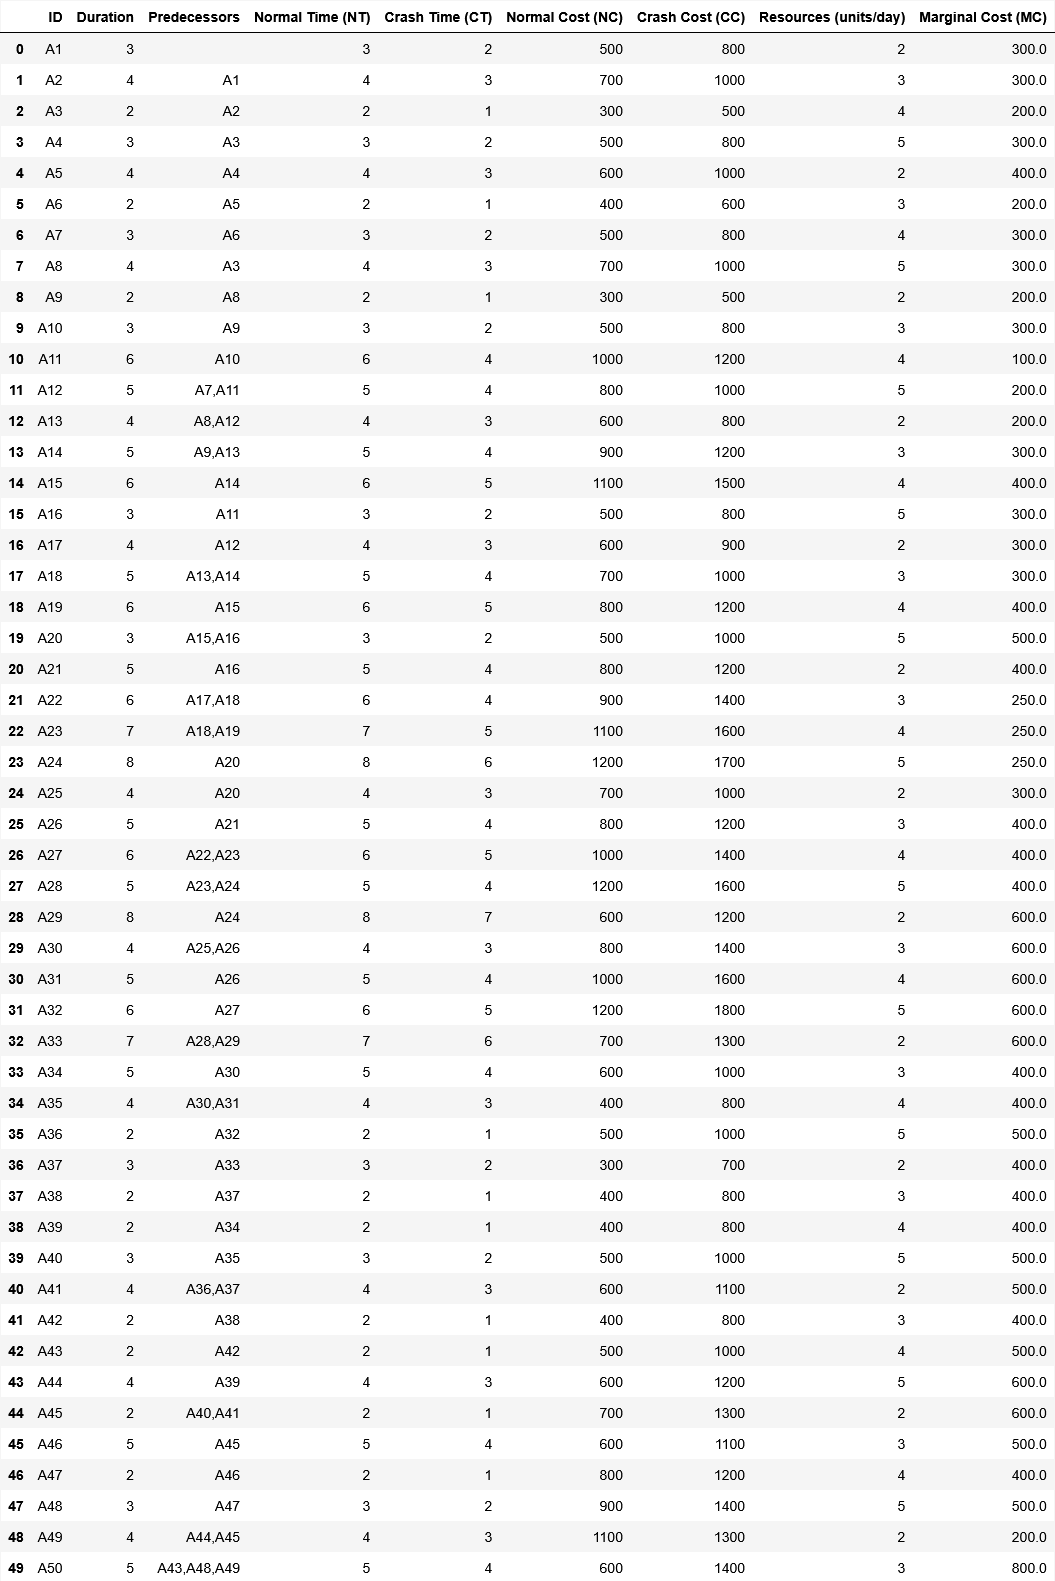

In [7]:
# Normal times are higher than crash times
normal_times = durations.copy()

# Crash times are lower than normal times
crash_times = [2, 3, 1, 2, 3, 
               1, 2, 3, 1, 2, 
               4, 4, 3, 4, 5, 
               2, 3, 4, 5, 2,
               4, 4, 5, 6, 3, 
               4, 5, 4, 7, 3, 
               4, 5, 6, 4, 3, 
               1, 2, 1, 1, 2,
               3, 1, 1, 3, 1, 
               4, 1, 2, 3, 4]

# Normal costs are lower than crash costs
normal_costs = [500, 700, 300, 500, 600, 
                400, 500, 700, 300, 500, 
                1000, 800, 600, 900, 1100, 
                500, 600, 700, 800, 500,
                800, 900, 1100, 1200, 700, 
                800, 1000, 1200, 600, 800,
                1000, 1200, 700, 600, 400, 
                500, 300, 400, 400, 500,
                600, 400, 500, 600, 700, 
                600, 800, 900, 1100, 600]

# Crash costs are higher than normal costs
crash_costs = [800, 1000, 500, 800, 1000, 
               600, 800, 1000, 500, 800, 
               1200, 1000, 800, 1200, 1500, 
               800, 900, 1000, 1200, 1000,
               1200, 1400, 1600, 1700, 1000, 
               1200, 1400, 1600, 1200, 1400, 
               1600, 1800, 1300, 1000, 800, 
               1000, 700, 800, 800, 1000,
               1100, 800, 1000, 1200, 1300, 
               1100, 1200, 1400, 1300, 1400]

# Create a DataFrame for crash data
df_crash = pd.DataFrame({
    "ID": ids,
    "Duration": durations,
    "Predecessors": predecessors,
    "Normal Time (NT)": normal_times,
    "Crash Time (CT)": crash_times,
    "Normal Cost (NC)": normal_costs,
    "Crash Cost (CC)": crash_costs,
    "Resources (units/day)": [2 + i % 4 for i in range(50)]
})

# Calculate Marginal Cost (MC)
df_crash['Marginal Cost (MC)'] = (
    (df_crash['Crash Cost (CC)'] - df_crash['Normal Cost (NC)']) /
    (df_crash['Normal Time (NT)'] - df_crash['Crash Time (CT)'])
)

# Conver the crash DataFrame to CSV
df_crash.to_csv('data/data_crash.csv')

# Show the crash DataFrame
show_df(df_crash,"df_crash")

Above we can see the complete `df_crash` DataFrame with the calculated values for each activity. Now, let's look at the crashing costs and the marginal costs of the activities to identify which activities can be crashed to reduce the project duration.

### Crashing Iterations

Now, we can proceed with the crashing analysis in the below code.

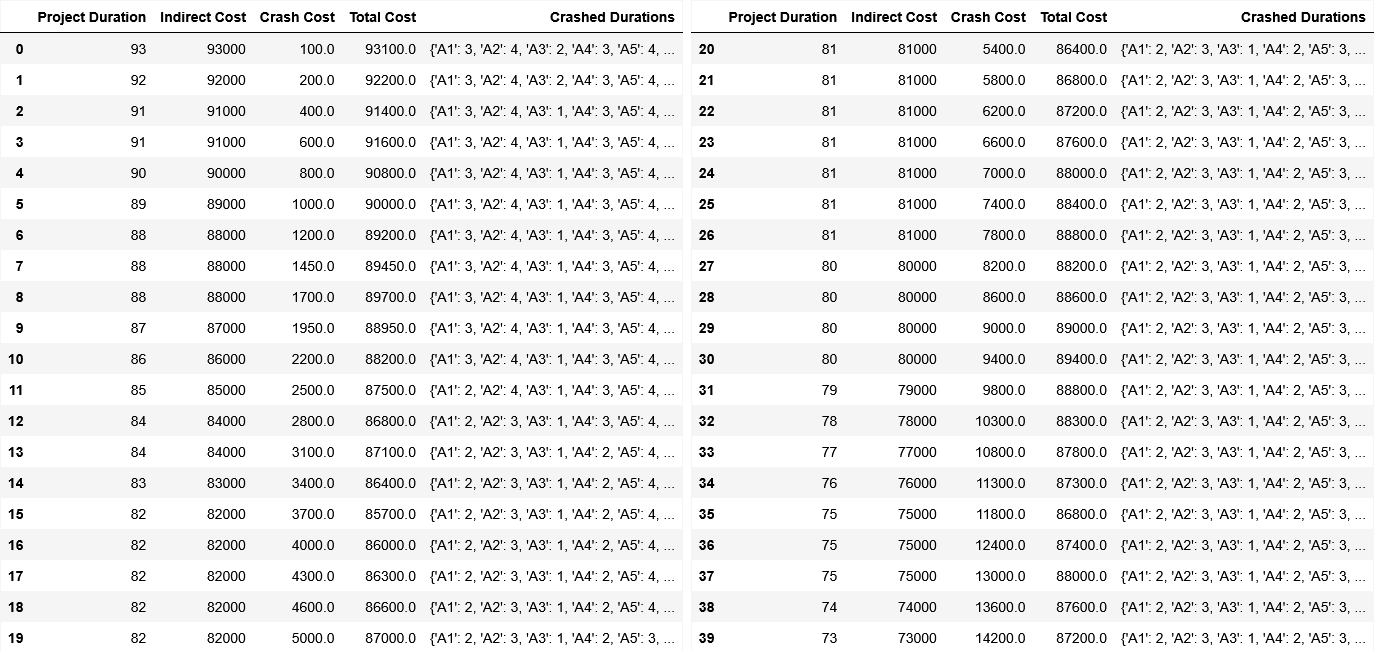

In [8]:

# Schedule computation function
def compute_schedule(durations_dict):
    est, eft, lst, lft, tf = {}, {}, {}, {}, {}
    pred_map = {row['ID']: [p.strip() for p in row['Predecessors'].split(',') if p.strip()] for _, row in df_crash.iterrows()}
    succ_map = defaultdict(list)
    for act, preds in pred_map.items():
        for p in preds:
            succ_map[p].append(act)
    for _, row in df_crash.iterrows():
        act = row['ID']
        duration = durations_dict[act]
        preds = pred_map[act]
        est[act] = max([eft[p] for p in preds] if preds else [0])
        eft[act] = est[act] + duration
    terminal_nodes = [act for act in df_crash['ID'] if not succ_map[act]]
    for act in reversed(df_crash['ID']):
        if act in terminal_nodes:
            lst[act] = eft[act]
            lft[act] = eft[act]
        else:
            lst[act] = min([est[s] for s in succ_map[act]])
            lft[act] = lst[act] - durations_dict[act]
        tf[act] = lft[act] - est[act]
    return est, eft, lst, lft, tf

# Initial duration dictionary
dur_dict = dict(zip(df_crash['ID'], df_crash['Duration']))

# Initialize
crashed_durations = dur_dict.copy()
indirect_cost_per_day = 1000
crash_log = []

# Compute initial schedule
est, eft, lst, lft, tf = compute_schedule(crashed_durations)
critical_activities = [act for act in df_crash['ID'] if tf[act] == 0]
crash_order = sorted(critical_activities, key=lambda x: df_crash.loc[df_crash['ID'] == x, 'Marginal Cost (MC)'].values[0])

# Crashing loop
for act in crash_order:
    ct = df_crash.loc[df_crash['ID'] == act, 'Crash Time (CT)'].values[0]
    while crashed_durations[act] > ct:
        crashed_durations[act] -= 1
        est, eft, lst, lft, tf = compute_schedule(crashed_durations)

        # Check critical path shift
        new_critical = [a for a in df_crash['ID'] if tf[a] == 0]
        if len(set(new_critical) - set(critical_activities)) > 0:
            crashed_durations[act] += 1
            break

        # Cost calculations
        project_duration = max(eft.values())
        indirect_cost = indirect_cost_per_day * project_duration

        crash_cost = sum(
            (dur_dict[aid] - crashed_durations[aid]) *
            df_crash.loc[df_crash['ID'] == aid, 'Marginal Cost (MC)'].values[0]
            for aid in ids if crashed_durations[aid] < dur_dict[aid]
        )

        total_cost = indirect_cost + crash_cost

        # Log the result
        crash_log.append({
            "Project Duration": project_duration,
            "Indirect Cost": indirect_cost,
            "Crash Cost": crash_cost,
            "Total Cost": total_cost,
            "Crashed Durations": crashed_durations.copy()
        })



# Convert to DataFrame
crash_log_df = pd.DataFrame(crash_log)

crash_log_df.to_csv('data/crash_log.csv')

show_df(crash_log_df, "crash_log", split=True)

The iterations of crashing are shown in the table above. Each iteration shows the project duration, indirect cost, crash cost, total cost, and the crashed durations of the activities. Now we can summarize the results of the crashing analysis.

## **Crashing Summary**

After performing all the iterations of crashing, we can summarize the results. The final output will include the following:

In [9]:
# Find the minimum cost row
min_cost_row = crash_log_df.loc[crash_log_df['Total Cost'].idxmin()]

# Extract the crashed durations
final_durations = min_cost_row['Crashed Durations']

# Convert to dictionary
crashed_summary = {
    act: dur_dict[act] - final_durations[act]
    for act in dur_dict
    if dur_dict[act] > final_durations[act]
}

# Print the results
print(f"Minimum Total Cost = Rs.{min_cost_row['Total Cost']} at Project Duration = {min_cost_row['Project Duration']} days.")
print("\nActivities Crashed:")
print("Activity ID\tCrashed Duration")
for act, days in crashed_summary.items():
    print(f"{act}\t\t{days} day{'s' if days>1 else''}")

Minimum Total Cost = Rs.85700.0 at Project Duration = 82 days.

Activities Crashed:
Activity ID	Crashed Duration
A1		1 day
A2		1 day
A3		1 day
A4		1 day
A6		1 day
A8		1 day
A9		1 day
A11		2 days
A12		1 day
A13		1 day
A14		1 day
A23		2 days
A24		2 days


### Total Cost vs Project Duration Plot
So, post crashing the duration of the project is reduced to **82 days** from **94 days**. The cost incurred after crashing the project is **Rs.  85700.00**. Let's visualise the crashing of the project in the below `Total Cost` versus `Project Duration` plot.

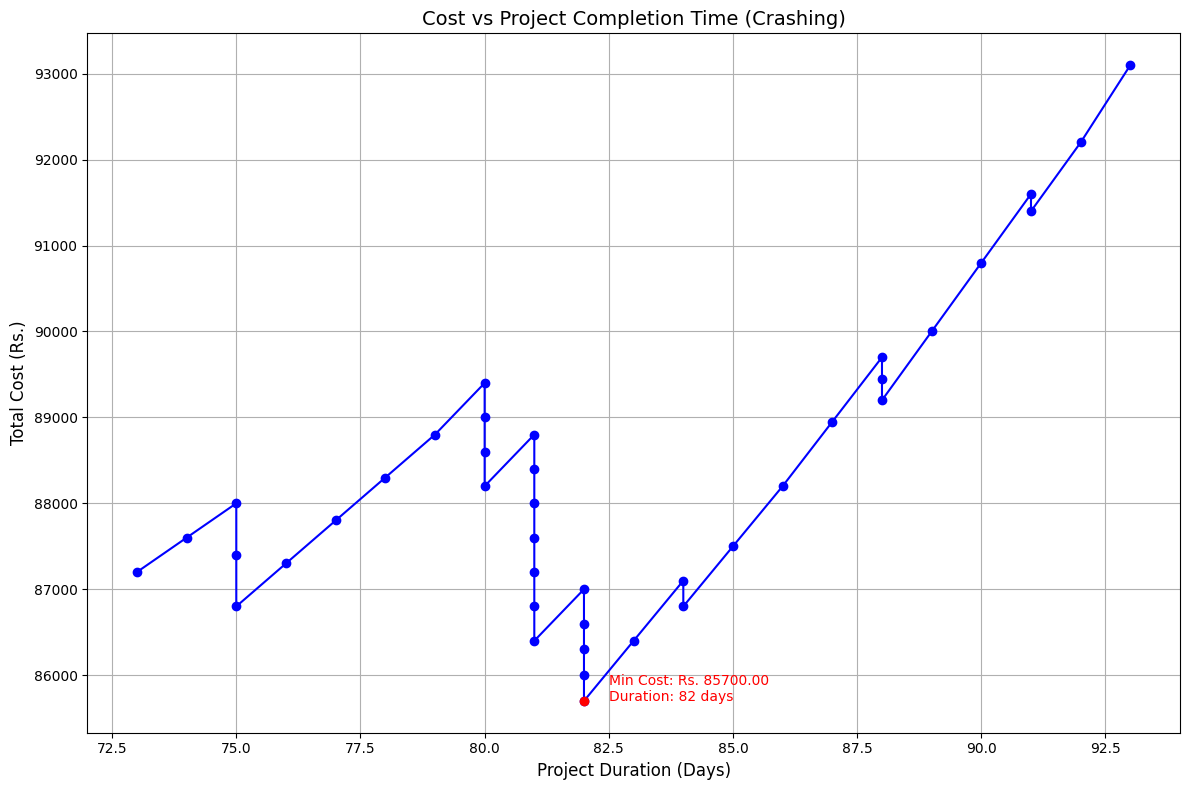

In [10]:
# Plotting cost vs project duration
plt.figure(figsize=(12, 8))
plt.plot(crash_log_df['Project Duration'], crash_log_df['Total Cost'], marker='o', color='b', linestyle='-', markersize=6)

# Annotating the minimum point
min_cost_row = crash_log_df.loc[crash_log_df['Total Cost'].idxmin()]
plt.scatter(min_cost_row['Project Duration'], min_cost_row['Total Cost'], color='red', zorder=5)
plt.text(min_cost_row['Project Duration'] + 0.5, min_cost_row['Total Cost'], 
         f"Min Cost: Rs. {min_cost_row['Total Cost']:.2f}\nDuration: {min_cost_row['Project Duration']} days", 
         fontsize=10, color='red', ha='left')

# Labels and title
plt.title("Cost vs Project Completion Time (Crashing)", fontsize=14)
plt.xlabel("Project Duration (Days)", fontsize=12)
plt.ylabel("Total Cost (Rs.)", fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.savefig('images/cost_vs_duration.png', dpi=300)
plt.show();


We can see from the plot also that the project crashing analysis successfully reduced the project duration from **94 days** to **82 days**, resulting in a total cost of **Rs. 85,700**. The cost-duration trade-off was visualized in a plot, illustrating the relationship between project duration and total cost. Now let's move on to resource leveling.




# **Resource Allocation**

Resources such as men, money, material, machinery, etc. are limited and conflicting demads are make for the same type of resources as a project progresses. Hence, a systematic method for the allocation of resources therefore becomes essential. There are two approaches to resource allocation:

## **Resource Smoothing** 
This approach aims to minimize the fluctuations in resource usage over time while maintaining the project schedule. It is typically used when resources are abundant and can be allocated flexibly.

## **Resource Leveling** 
This approach aims to balance resource usage by delaying non-critical activities to avoid overloading resources. It is used when resources are limited and must be allocated efficiently.

In our case, we have limited resoures (3 in total) so we will perform resource leveling on the project.

## **Algorithm Steps**

1.  Make the network diagram of the project. Calculate EST, EFT, LST, LFT and TF for each activity. (Already done in the previous section)
2. Halt when both the activity and resources are available and allocate resources to the activity according to the priority.
3. Prior to the allocation at the halt, update ES, EF and TF of the activities afftected by floating out of an earlier activity.
4. Assign priorities to the activities based on the following:
    1. Least TF
    2. High value or Resource×Duration
    3. High value of Resource
    4. The lower tail number of the activity
5. Repeat the above steps until resources are levelled completely.

## **Resource Leveling on the Project Data**
Now, let's implement the above steps in Python to perform resource leveling. 

### Resource Allocation Dataframe

We will start by looking at the first few rows of the resource allocation dataframe.

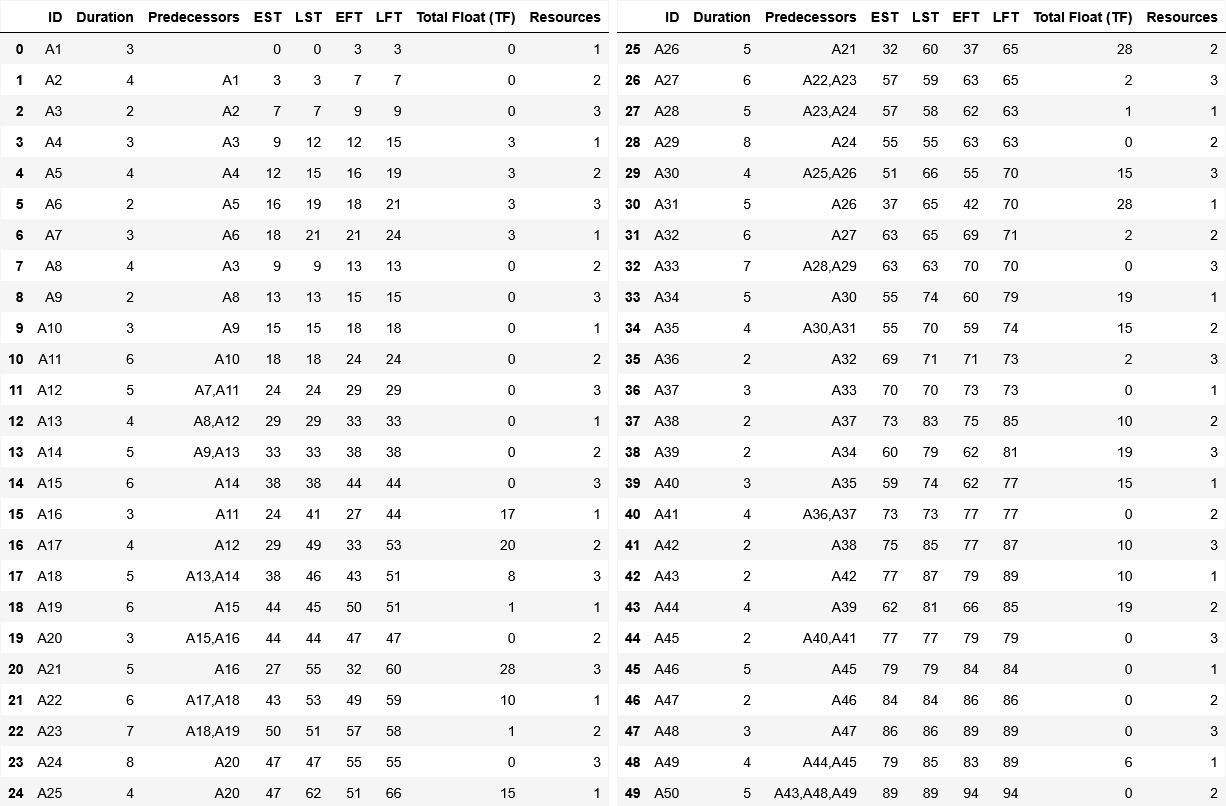

In [11]:
df_level = df_cpm.copy()
resources = [1 + i % 3 for i in range(50)]
df_level['Resources'] = resources
df_level.to_csv('data/data_level.csv')
show_df(df_level, "df_level", split=True)

### Resource Leveling Process
Now, let's implement the resource leveling process in Python.

In [12]:
# Step 1: Sort activities by EST (Earliest Start Time)
df_level = df_level.sort_values(by='EST').reset_index(drop=True)

# Step 2: Initialize resource allocation
resource_units_available = 3
resource_allocation = {f"R{i+1}": [] for i in range(resource_units_available)}
activity_allocation = {}

# Step 3: Allocate resources to activities
for _, row in df_level.iterrows():
    activity = row['ID']
    est = row['EST']
    eft = row['EFT']
    resources_needed = row['Resources']

    # Check if resources are available
    allocated = False
    for resource, allocations in resource_allocation.items():
        if all(eft <= alloc['start'] or est >= alloc['end'] for alloc in allocations):
            if resources_needed <= resource_units_available:
                resource_allocation[resource].append({'activity': activity, 'start': est, 'end': eft})
                activity_allocation[activity] = resource
                allocated = True
                break

    # If not allocated, delay the activity
    if not allocated:
        for resource, allocations in resource_allocation.items():
            latest_end = max(alloc['end'] for alloc in allocations) if allocations else 0
            if all(latest_end + eft - est <= alloc['start'] or latest_end + eft - est >= alloc['end'] for alloc in allocations):
                resource_allocation[resource].append({'activity': activity, 'start': latest_end, 'end': latest_end + eft - est})
                activity_allocation[activity] = resource
                break

Now, let's look at the activities that got delayed due to resource allocation. The activities that got delayed are the ones that were not on the critical path and had some float.

In [13]:
# Step 1: Prioritize critical activities
critical_activities = df_level[df_level['Total Float (TF)'] == 0]['ID'].tolist()

# Step 2: Adjust resource leveling logic to prioritize critical activities
resource_allocation = {f"R{i+1}": [] for i in range(resource_units_available)}
activity_allocation = {}

for _, row in df_level.iterrows():
    activity = row['ID']
    est = row['EST']
    eft = row['EFT']
    resources_needed = row['Resources']

    # Prioritize critical activities
    if activity in critical_activities:
        allocated = False
        for resource, allocations in resource_allocation.items():
            if all(eft <= alloc['start'] or est >= alloc['end'] for alloc in allocations):
                if resources_needed <= resource_units_available:
                    resource_allocation[resource].append({'activity': activity, 'start': est, 'end': eft})
                    activity_allocation[activity] = resource
                    allocated = True
                    break
        if not allocated:
            for resource, allocations in resource_allocation.items():
                latest_end = max(alloc['end'] for alloc in allocations) if allocations else 0
                if all(latest_end + eft - est <= alloc['start'] or latest_end + eft - est >= alloc['end'] for alloc in allocations):
                    resource_allocation[resource].append({'activity': activity, 'start': latest_end, 'end': latest_end + eft - est})
                    activity_allocation[activity] = resource
                    break
    else:
        # Allocate non-critical activities as before
        allocated = False
        for resource, allocations in resource_allocation.items():
            if all(eft <= alloc['start'] or est >= alloc['end'] for alloc in allocations):
                if resources_needed <= resource_units_available:
                    resource_allocation[resource].append({'activity': activity, 'start': est, 'end': eft})
                    activity_allocation[activity] = resource
                    allocated = True
                    break
        if not allocated:
            for resource, allocations in resource_allocation.items():
                latest_end = max(alloc['end'] for alloc in allocations) if allocations else 0
                if all(latest_end + eft - est <= alloc['start'] or latest_end + eft - est >= alloc['end'] for alloc in allocations):
                    resource_allocation[resource].append({'activity': activity, 'start': latest_end, 'end': latest_end + eft - est})
                    activity_allocation[activity] = resource
                    break

# Step 3: Recompute the schedule
df_level['Adjusted EST'] = df_level['ID'].map(lambda x: min([alloc['start'] for alloc in resource_allocation[activity_allocation[x]] if alloc['activity'] == x]))
df_level['Adjusted EFT'] = df_level['Adjusted EST'] + df_level['Duration']

# Step 4: Analyze delays
activity_delays = df_level[df_level['Adjusted EST'] > df_level['EST']][['ID', 'EST', 'Adjusted EST', 'LST']]
if not activity_delays.empty:
    print("Activities delayed after prioritizing critical activities:")
    print(activity_delays)
else:
    print("No activities were delayed after prioritizing critical activities.")

Activities delayed after prioritizing critical activities:
     ID  EST  Adjusted EST  LST
25  A24   47            49   47
29  A34   55            57   74
30  A35   55            62   70
32  A28   57            66   58
33  A40   59            71   74
34  A39   60            74   79
35  A44   62            76   81


Since, all these are non-critical activities therefore the project duration after leveling is same.

In [14]:
# Check if the project duration has changed
original_project_duration = max(df_cpm['EFT'])
leveled_project_duration = max(df_level['EFT'])

print(f"Original Project Duration:\t{original_project_duration} days")
print(f"Leveled Project Duration:\t{leveled_project_duration} days")

original_critical_path = df_cpm[df_cpm['Total Float (TF)'] == 0]['ID'].tolist()
leveled_critical_path = df_level[df_level['Total Float (TF)'] == 0]['ID'].tolist()

print(f"Original Critical Activities:\t{original_critical_path}")
print(f"Leveled Critical Activities:\t{leveled_critical_path}")

Original Project Duration:	94 days
Leveled Project Duration:	94 days
Original Critical Activities:	['A1', 'A2', 'A3', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A20', 'A24', 'A29', 'A33', 'A37', 'A41', 'A45', 'A46', 'A47', 'A48', 'A50']
Leveled Critical Activities:	['A1', 'A2', 'A3', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A20', 'A24', 'A29', 'A33', 'A37', 'A41', 'A45', 'A46', 'A47', 'A48', 'A50']


### Resource Leveling Gantt Chart
Now, let's visualize the resource allocation using a Gantt chart. The Gantt chart will show the activities on the y-axis and the time on the x-axis. The bars will represent the duration of each activity, and the colors will indicate the resources allocated to each activity.

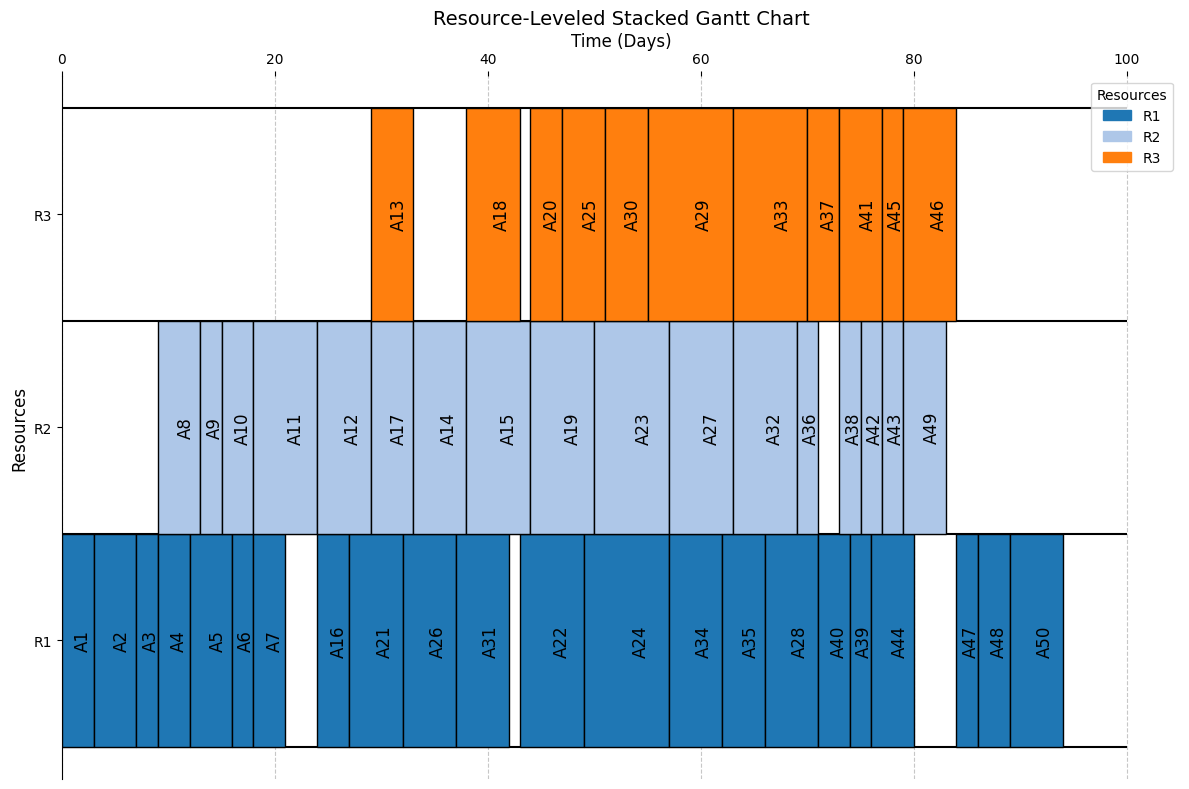

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.tab20.colors
color_map = {f"R{i+1}": colors[i] for i in range(resource_units_available)}

for resource, allocations in resource_allocation.items():
    for alloc in allocations:
        activity = alloc['activity']
        start = alloc['start']
        end = alloc['end']
        ax.barh(resource, end - start, left=start, color=color_map[resource], edgecolor='black', label=activity, height=1)  # Increased bar height
        # Add activity label to the bar
        ax.text(start + (end - start) / 1.5, resource, activity, ha='center', va='center', color='black', fontsize=12, rotation=90)

# Step 5: Add labels and legend
ax.set_xlabel("Time (Days)", fontsize=12)
ax.set_ylabel("Resources", fontsize=12)
ax.set_title("Resource-Leveled Stacked Gantt Chart", fontsize=14)

# Add grid lines behind the bars
ax.grid(axis='x', linestyle='--', alpha=0.7, zorder=0)

# Add ticks on the top x-axis
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

# Set zorder for bars to be above the grid lines
for bar in ax.patches:
    bar.set_zorder(3)

# Create a legend for resources
handles = [mpatches.Patch(color=color_map[resource], label=resource) for resource in resource_allocation.keys()]
ax.legend(handles=handles, title="Resources", loc='upper right', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.hlines(y=[-0.5,0.5,1.5,2.5], xmin=0, xmax=100, color='black')
plt.tight_layout()
plt.savefig('images/resource-leveling.png', dpi=300)
plt.show();


Here, the above Gantt chart visualizes the resource-leveled schedule of the project. Each horizontal bar represents an activity, with its start and end times aligned along the timeline (in days). The chart is divided into three resource categories (`R1`, `R2`, and `R3`), each corresponding to a specific resource unit.


\pagebreak

# **Conclusion**

This project provided a comprehensive analysis of project scheduling and optimization techniques, including Critical Path Method (CPM), project crashing, and resource leveling. The key takeaways from the analysis are as follows:

1. **Critical Path Analysis**:
    - The critical path was identified, consisting of activities with zero total float. These activities directly determine the project's duration.
    - A1, A2, A3, A8, A9, A10, A11, A12, A13, A14, A15, A20, A24, A29, A33, A37, A41, A45, A46, A47, A48 and A50 were identified as the critical activities.
    - The total project duration was calculated as **94 days**.

2. **Project Crashing**:
    - By strategically reducing the duration of critical activities, the project duration was reduced to **82 days**.
    - The total cost after crashing was Rs. **85,700**, which includes both direct and indirect costs.
    - The activities that were crashed and their respective durations are as follows:
    
    |Activity ID|Crashed Duration|
    |-----------|----------------|
    |A1         |1 day |
    |A2         |1 day |
    |A3         |1 day |
    |A4         |1 day |
    |A6         |1 day |
    |A8         |1 day |
    |A9         |1 day |
    |A11        |2 days|
    |A12        |1 day |
    |A13        |1 day |
    |A14        |1 day |
    |A23        |2 days|
    |A24        |2 days|


3. **Resource Leveling**:
    - Resource leveling ensured efficient utilization of limited resources while maintaining the project timeline.
    - A Gantt chart was created to visualize the resource-leveled schedule, highlighting the allocation of resources to various activities.

This analysis demonstrates the importance of systematic project scheduling and optimization techniques in managing complex projects. By applying CPM, project crashing, and resource leveling, we achieved a more efficient and cost-effective project schedule while ensuring timely completion.

\pagebreak

# Links

## Data Files

The data files (`.csv` files) generated in this project are available in the GitHub repository.

* Project Data: 
[https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/data/data.csv](https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/data/data.csv)

* Crtical Path Analysis Data: 
[https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/data/data_cpm.csv](https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/data/data_cpm.csv)

* Crashing Data: 
[https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/data/data_crash.csv](https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/data/data_crash.csv)

* Crashing Iterations: 
[https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/data/crash_log.csv](https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/data/crash_log.csv)

* Resource Allocation Data:
[https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/data/data_level.csv](https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/data/data_level.csv)

## Images

The images (`.png` files) generated in this project are available in the GitHub repository.

* AOA Network Diagram: 
[https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/images/network-diagram.png](https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/images/network-diagram.png)

* Gantt Chart: 
[https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/images/gantt-chart.png](https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/images/gantt-chart.png)

* Cost vs Duration Plot: 
[https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/images/cost_vs_duration.png](https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/images/cost_vs_duration.png)

* Resource Leveling Chart: 
[https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/images/resource-leveling.png](https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/images/resource-leveling.png)

## Code File 

The `Python` code for the entire project is written in a Jupyter Notebook (`.ipynb` file) .

[https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/main.ipynb](https://github.com/AumGupta/MOR/blob/main/Scheduling%20Techniques/main.ipynb)

## GitHub Repository 

The entire project, including data files, images, code and project report, is available in the GitHub repository.

[https://github.com/AumGupta/MOR/tree/main/Scheduling%20Techniques](https://github.com/AumGupta/MOR/tree/main/Scheduling%20Techniques)

---
